In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
!nvidia-smi

Wed Nov  1 18:10:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
!unzip gdrive/My\ Drive/PlantVillage/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e345153-aed9-4879-a2cc-24f9dc5100e7___UF.GRC_YLCV_Lab 01798_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e37e8ad-3944-4e11-bc10-dd82616274d7___YLCV_NREC 2915_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e382244-fb3a-4caa-af71-05fff25f1c27___UF.GRC_YLCV_Lab 03397_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e3b9886-ce13-49d5-8f80-ccf4e5ddbeac___YLCV_GCREC 5479_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e615038-7a87-446a-a2cd-f76c5c75b6dd___YLCV_GCREC 5144_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e6938d9-1ab0-4728-993c-1069b66ce73b___UF.GRC_YLCV_Lab 02727_final_mas

In [10]:
pip install split-folders[full]

In [11]:
import splitfolders

In [12]:
input_file = "plantvillage dataset/color"
output_file = "plantvillage dataset/splitted"

In [13]:
splitfolders.ratio(input_file, output = output_file, seed = 42, ratio=(.7, .2, .1), group_prefix = None)

Copying files: 54305 files [00:26, 2080.53 files/s]


In [14]:
#importing needed Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [15]:
#Exploratory Data Analysis
len(os.listdir("/content/plantvillage dataset/splitted/train"))

38

In [16]:
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [17]:
train_datagen = ImageDataGenerator(zoom_range = 0.5, shear_range = 0.3, horizontal_flip = True)
val_datagen =  ImageDataGenerator(preprocessing_function = preprocess_input)

In [18]:
train = train_datagen.flow_from_directory(directory = '/content/plantvillage dataset/splitted/train',
                                          target_size = (256,256),
                                          batch_size = 32)

valid = val_datagen.flow_from_directory(directory = '/content/plantvillage dataset/splitted/val',
                                         target_size = (256,256),
                                          batch_size = 32)

Found 37997 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [19]:
t_img, label = train.next()

In [20]:
t_img.shape

(32, 256, 256, 3)

In [21]:
def plotImage(img_arr, label):
  for im, l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    img_array = img_to_array(im)
    img_array /= 255.0
    plt.imshow(img_array)
    plt.show()

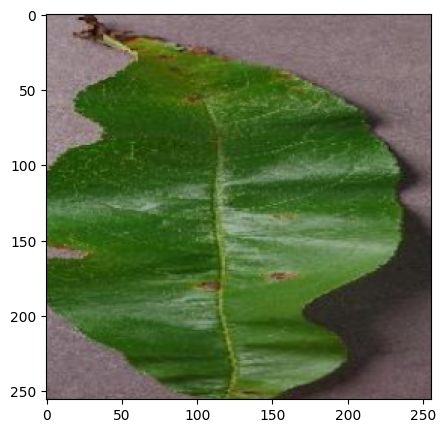

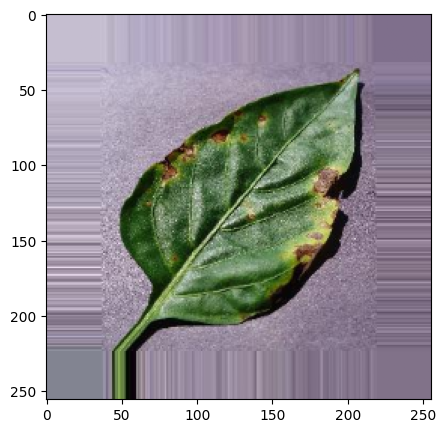

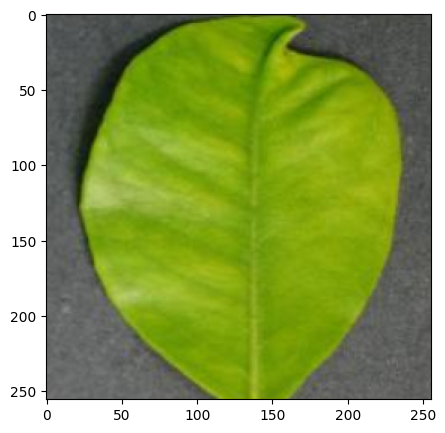

In [22]:
plotImage(t_img[:3], label[:3])

In [23]:
# Building the model
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [24]:
base_model = VGG19(input_shape = (256,256,3), include_top = False)

80134624/80134624 [==============================] - 5s 0us/step


In [25]:
for layer in base_model.layers:
  layer.trainable = False

In [26]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [27]:
X = Flatten()(base_model.output)
X = Dense(units = 38, activation = 'softmax')(X)

# Creating the Model
model = Model(base_model.input, X)

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [29]:
# Compiling the Model

model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [30]:
# Early Stopping and Model Checkpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [65]:
# Early Stopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 6, verbose = 1)

# Model Checkpoint
mc = ModelCheckpoint(filepath = 'best_model.h5', monitor = 'val_accuracy', min_delta = 0.01, patience = 6, verbose = 1, save_best_only = True)

In [66]:
# adding to array
cb = [es,mc]

In [70]:
his = model.fit(train, steps_per_epoch = 30, epochs = 40, verbose = 1, callbacks = cb, validation_data = valid, validation_steps = 20)

Epoch 1/40
30/30 [==============================] - ETA: 0s - loss: 9.0003 - accuracy: 0.8604
Epoch 1: val_accuracy did not improve from 0.77812
30/30 [==============================] - 26s 888ms/step - loss: 9.0003 - accuracy: 0.8604 - val_loss: 13.3928 - val_accuracy: 0.7688
Epoch 2/40
30/30 [==============================] - ETA: 0s - loss: 9.0022 - accuracy: 0.8729
Epoch 2: val_accuracy did not improve from 0.77812
30/30 [==============================] - 30s 941ms/step - loss: 9.0022 - accuracy: 0.8729 - val_loss: 13.9945 - val_accuracy: 0.7750
Epoch 3/40
30/30 [==============================] - ETA: 0s - loss: 8.6424 - accuracy: 0.8677
Epoch 3: val_accuracy did not improve from 0.77812
30/30 [==============================] - 20s 685ms/step - loss: 8.6424 - accuracy: 0.8677 - val_loss: 24.6327 - val_accuracy: 0.6844
Epoch 4/40
30/30 [==============================] - ETA: 0s - loss: 7.5543 - accuracy: 0.8813
Epoch 4: val_accuracy did not improve from 0.77812
30/30 [==============

In [71]:
# Plotting the model
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

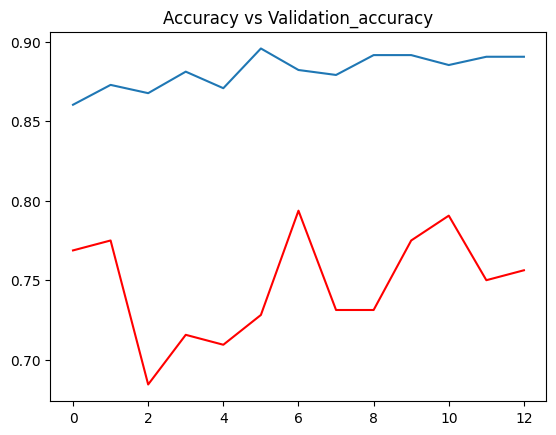

In [72]:
#Plotting the Accuracy
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')
plt.title("Accuracy vs Validation_accuracy")
plt.show()

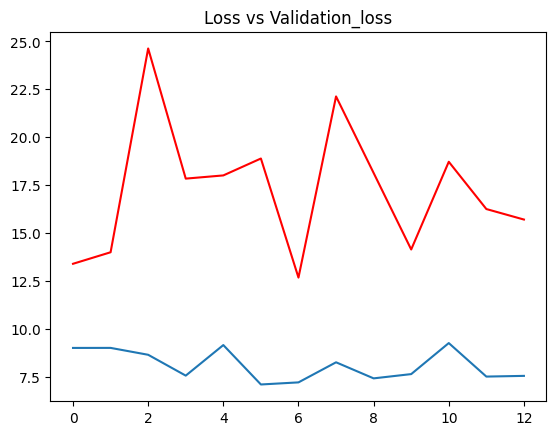

In [73]:
# Plotting the Loss
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')
plt.title("Loss vs Validation_loss")
plt.show()

In [74]:
# Load the best Model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [75]:
# Evaluating the Model
acc = model.evaluate_generator(valid)[1]
print(f"The accuracy of our VGG model is : {acc*100}%")

<ipython-input-75-616e10d4e644>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(valid)[1]


The accuracy of our VGG model is : 78.76302003860474%


In [76]:
train.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [77]:
list(train.class_indices.keys())

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [78]:
list(train.class_indices.values()), list(train.class_indices.keys())

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 ['Apple___Apple_scab',
  'Apple___Black_rot',
  'Apple___Cedar_apple_rust',
  'Apple___healthy',
  'Blueberry___healthy',
  'Cherry_(including_sour)___Powdery_mildew',
  'Cherry_(including_sour)___healthy',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Common_rust_',
  'Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___healthy',
  'Grape___Black_rot',
  'Grape___Esca_(Black_Measles)',
  'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
  'Grape___healthy',
  'Orange___Haunglongbing_(Citrus_greening)',
  'Peach___Bacterial_spot',
  'Peach___healthy',
  'Pepper,_bell___Bacterial_spot',
  'Pepper,_bell___healthy',
  'Potato___Early_blight',
  'Potato___Late_blight',
  'Potato___healthy',
  'Raspberry___healthy',
  'Soybean___healthy',
  'Squas

In [79]:
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

In [80]:
# Checking the predictions

def prediction(path):
  img = load_img(path,target_size = (256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis = 0)
  pred = np.argmax(model.predict(img))
  print(f"The image belongs to {ref[pred]}")

In [81]:
path = "/content/plantvillage dataset/splitted/test/Strawberry___Leaf_scorch/a6e365bb-d82a-4a7c-b124-cd7cbbbdc69f___RS_L.Scorch 1375.JPG"
prediction(path)

1/1 [==============================] - 0s 150ms/step
The image belongs to Strawberry___Leaf_scorch
